In [1]:
################### standard ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################### allow import from src ###################
import sys, os
sys.path.append(os.path.abspath(".."))

################### pipeline step ###################
import src.data_prep as data
import src.models.linear_reg as linear
import src.config.feature_def as feature_def
import src.models.utils as utils

In [2]:
monthly = data.prepare_monthly_dataset("../data/Major_Crime_Indicators_Open_Data.csv")

################ define features ################
feature_cols = feature_def.FEATURE_COLS
target_col = feature_def.TARGET_COL

################ train ################
model, y_test, y_pred, metrics = linear.train_linear_model(
    monthly, feature_cols, target_col, scale=True
)
metrics

{'R2': 0.757205165084714,
 'MAE': 0.046994748992940684,
 'MSE': 0.004065202720564747,
 'RMSE': 0.06375894227921874}

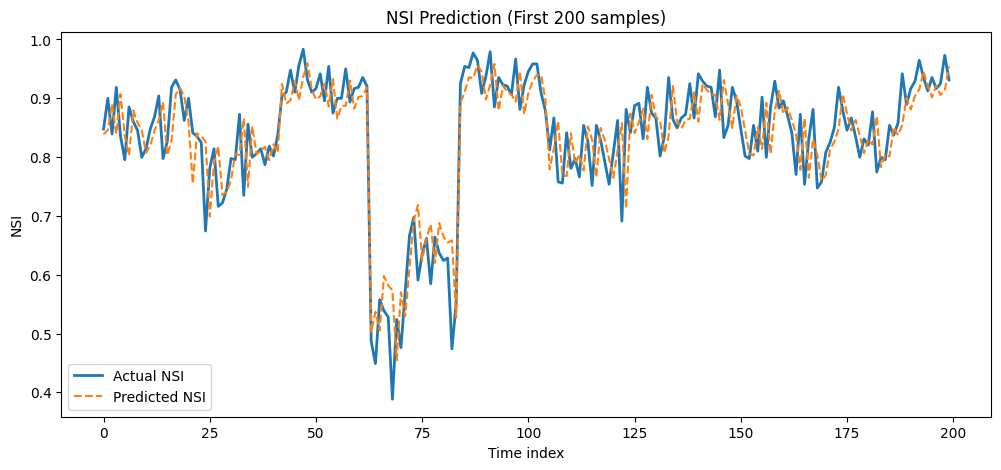

In [3]:
utils.plot_predictions(y_test, y_pred, 200)